In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import tensorflow as tf
from waveimage import WaveImage, calc_dim, calc_U, mnist_reshape_32
from scipy.stats import multivariate_normal
import math, sys, os, pickle
from record import Record, affiche_records
import time

In [15]:
#del dict_records

#nom_fic = 'backbone-CNN-parts-base'; liste_thresholds =(1, 3e-1, 1e-1, 3e-2, 1e-2)
#nom_fic = 'base-base'; liste_thresholds = (1e-1, 1e-2, 1e-3, 1e-4, 1e-5)
#nom_fic = 'base-base-1000-IG-test'; liste_thresholds = (1e-1, 1e-2, 1e-3, 1e-4, 1e-5)
nom_fic = 'base-naive-test-1000'; liste_thresholds = (1e-1, 1e-2, 1e-3, 1e-4, 1e-5)



In [16]:
#dict_records = np.load('mnist-waveimage-records-FEP-dual-full-limit.npy').tolist()
dict_records = np.load('mnist-waveimage-records-H0_init-'+nom_fic+'.npy').tolist()
dict_records_bis = np.load('mnist-waveimage-records-H0_init-'+nom_fic+'-IG-test.npy').tolist()
for k in dict_records_bis:
    dict_records[k] = {}
    for k2 in dict_records_bis[k]:
        dict_records[k][k2]  = dict_records_bis[k][k2]
#dict_records = np.load('mnist-waveimage-records-FEP-dual-full-H0_init-naive-bayes.npy').tolist()
#dict_records = np.load('tmp.npy').tolist() # +++
#dict_records = np.load('data/mnist-waveimage-FCNN-records-predictive-1e-05.npy').tolist()
#dict_records = np.load('mnist-waveimage-CNN-backbone-records-predictive.npy').tolist()
#dict_records = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-FEP-dual-H0_init.npy').tolist()
'''dict_records = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts.npy').tolist()
dict_records_bis = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-saliency.npy').tolist()
dict_records_bis = np.load('mnist-waveimage-records-FEP-dual.npy').tolist()
for k in dict_records_bis:
    dict_records[k] = {}
    for k2 in dict_records_bis[k]:
        dict_records[k][k2]  = dict_records_bis[k][k2]
dict_records_ter = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-generic-saliency.npy').tolist()
for k in dict_records_ter:
    dict_records[k] = {}
    for k2 in dict_records_ter[k]:
        dict_records[k][k2]  = dict_records_ter[k][k2]
dict_records_quad = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-FEP-full-dual.npy').tolist()
for k in dict_records_quad:
    dict_records[k] = {}
    for k2 in dict_records_quad[k]:
        dict_records[k][k2]  = dict_records_quad[k][k2]
dict_records_quint = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-FEP-dual.npy').tolist()
for k in dict_records_quint:
    dict_records[k] = {}
    for k2 in dict_records_quint[k]:
        dict_records[k][k2]  = dict_records_quint[k][k2]'''


"dict_records = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts.npy').tolist()\ndict_records_bis = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-saliency.npy').tolist()\ndict_records_bis = np.load('mnist-waveimage-records-FEP-dual.npy').tolist()\nfor k in dict_records_bis:\n    dict_records[k] = {}\n    for k2 in dict_records_bis[k]:\n        dict_records[k][k2]  = dict_records_bis[k][k2]\ndict_records_ter = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-generic-saliency.npy').tolist()\nfor k in dict_records_ter:\n    dict_records[k] = {}\n    for k2 in dict_records_ter[k]:\n        dict_records[k][k2]  = dict_records_ter[k][k2]\ndict_records_quad = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-FEP-full-dual.npy').tolist()\nfor k in dict_records_quad:\n    dict_records[k] = {}\n    for k2 in dict_records_quad[k]:\n        dict_records[k][k2]  = dict_records_quad[k][k2]\ndict_records_quint = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-FEP

In [17]:
liste_thresholds

(0.1, 0.01, 0.001, 0.0001, 1e-05)

In [69]:
'mnist-waveimage-records-H0_init-'+nom_fic+'.npy'

'mnist-waveimage-records-H0_init-base-naive-test-1000.npy'

In [18]:
NB_CLASSES = 10
NB_TRIALS = 100

In [26]:
liste_pol  = (\
            'smooth-predictive-IG',  
            'smooth-predictive-Info-Gain', 'smooth-predictive-IG-post', 'smooth-predictive-Infomax', \
            'smooth-predictive-Innovation', 'smooth-predictive-Conservation',  \
            'saliency-based', 'generic-saliency-based', 'random', \
            #'full', \
            'sharp-predictive-Info-Gain', 'sharp-predictive-Infomax', \
            'sharp-predictive-Innovation', 'sharp-predictive-Conservation', 'sharp-predictive-IG-post',\
             )

liste_lab  = (\
              'predictive_IG',
            'predictive_LC', 'predictive_PC', 'predictive Infomax', \
            'predictive Salience', 'predictive ELBO',  \
            'class-specific LC pre-processing', 'generic LC pre-processing', 'random', \
            #'full', \
            'sharp-predictive-Info-Gain', 'sharp-predictive-Infomax', \
            'sharp-predictive-Innovation', 'sharp-predictive-Conservation', 'sharp-predictive-IG-post',\
             )

liste_col = ['b', 'b--', 'r:', 'g', 'r','m','y','y--', 'y:','b:', 'g:', 'r:','m:','k:']

liste_dot = ['d', 'd', 'd', '^', 'o','s','v','v', 'x','b:', 'g:', 'r:','m:','k:']



In [20]:
liste_NB_TRIALS = []
for z in range(NB_CLASSES):
    liste_NB_TRIALS += [NB_TRIALS] #[len(Data_test[z][0][(0,0)])]

mem_classif_rate = {}
mem_mem_saccades = {}
mem_mem_compression_rate = {}




Policy : smooth-predictive-IG
Threshold : 0.1
classif rate : 74.5
nb_saccades : 5.494
nb_coeffs : 58.734
compression rate : 92.5084183673
final posterior : 0.994304840259
final entropy : 0.0340235027823


Policy : smooth-predictive-IG
Threshold : 0.01
classif rate : 76.8
nb_saccades : 11.963
nb_coeffs : 98.937
compression rate : 87.3804846939
final posterior : 0.999427640672
final entropy : 0.00358094127439


Policy : smooth-predictive-IG
Threshold : 0.001
classif rate : 82.1
nb_saccades : 21.118
nb_coeffs : 142.23
compression rate : 81.8584183673
final posterior : 0.99911816414
final entropy : 0.0026693263634


Policy : smooth-predictive-IG
Threshold : 0.0001
classif rate : 85.3
nb_saccades : 31.794
nb_coeffs : 188.379
compression rate : 75.9720663265
final posterior : 0.998539847142
final entropy : 0.00449992487161


Policy : smooth-predictive-IG
Threshold : 1e-05
classif rate : 86.4
nb_saccades : 41.871
nb_coeffs : 230.934
compression rate : 70.5441326531
final posterior : 0.99681

/usr/lib/python2.7/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)




Policy : smooth-predictive-Innovation
Threshold : 0.01
classif rate : 76.5
nb_saccades : 21.458
nb_coeffs : 144.819
compression rate : 81.5281887755
final posterior : 0.998965900462
final entropy : 0.00484197804527


Policy : smooth-predictive-Innovation
Threshold : 0.001
classif rate : 82.6
nb_saccades : 33.959
nb_coeffs : 205.962
compression rate : 73.7293367347
final posterior : 0.998435582453
final entropy : 0.0046274775056


Policy : smooth-predictive-Innovation
Threshold : 0.0001
classif rate : 85.0
nb_saccades : 45.339
nb_coeffs : 256.527
compression rate : 67.2797193878
final posterior : 0.996679084242
final entropy : 0.00877156804475


Policy : smooth-predictive-Innovation
Threshold : 1e-05
classif rate : 87.0
nb_saccades : 56.505
nb_coeffs : 304.002
compression rate : 61.2242346939
final posterior : 0.996108694289
final entropy : 0.0103882011513


Policy : smooth-predictive-Conservation
Threshold : 0.1
classif rate : 86.2
nb_saccades : 2.494
nb_coeffs : 33.516
compression r



Policy : sharp-predictive-Conservation
Threshold : 0.01
classif rate : 82.2
nb_saccades : 8.162
nb_coeffs : 69.171
compression rate : 91.1771683673
final posterior : 0.999063379172
final entropy : 0.00427847583892


Policy : sharp-predictive-Conservation
Threshold : 0.001
classif rate : 83.9
nb_saccades : 13.009
nb_coeffs : 95.244
compression rate : 87.8515306122
final posterior : 0.999041533344
final entropy : 0.00309277607456


Policy : sharp-predictive-Conservation
Threshold : 0.0001
classif rate : 85.6
nb_saccades : 19.955
nb_coeffs : 128.505
compression rate : 83.6090561224
final posterior : 0.998340742534
final entropy : 0.00477330940275


Policy : sharp-predictive-Conservation
Threshold : 1e-05
classif rate : 86.8
nb_saccades : 28.418
nb_coeffs : 165.966
compression rate : 78.8308673469
final posterior : 0.997195250843
final entropy : 0.00725097830807


Policy : sharp-predictive-IG-post
Threshold : 0.1
classif rate : 75.1
nb_saccades : 5.051
nb_coeffs : 55.887
compression rate

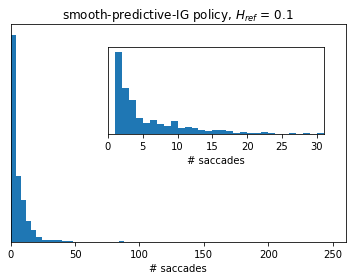

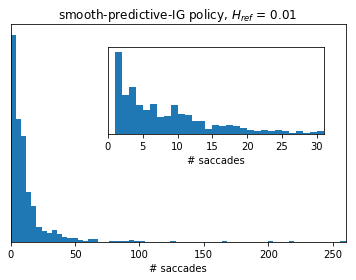

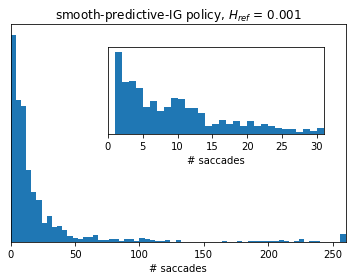

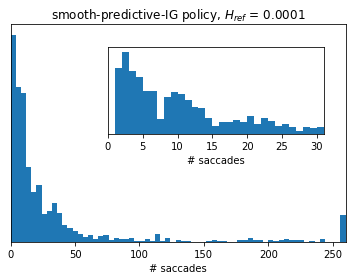

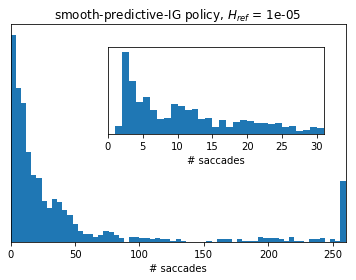

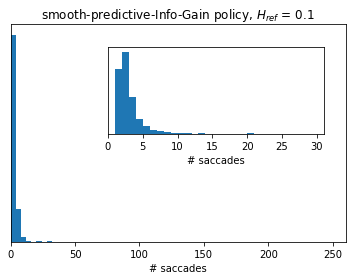

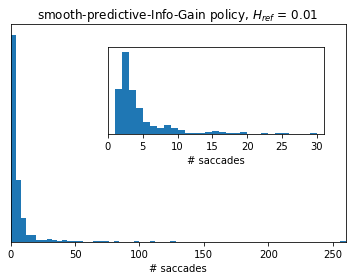

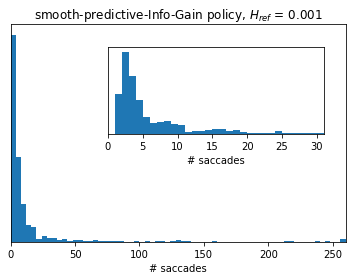

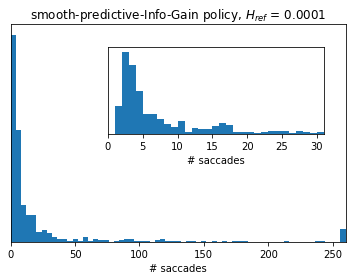

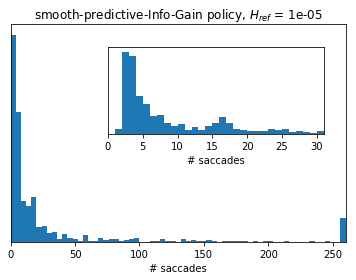

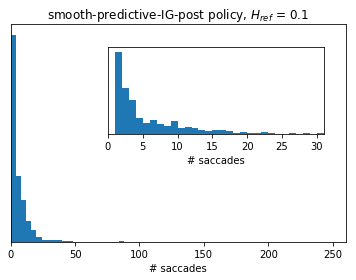

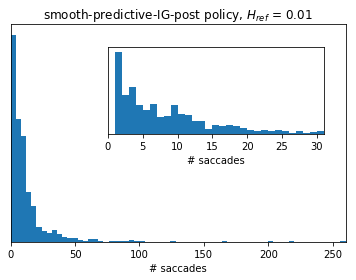

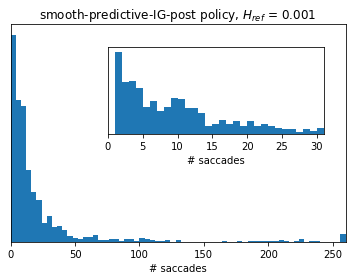

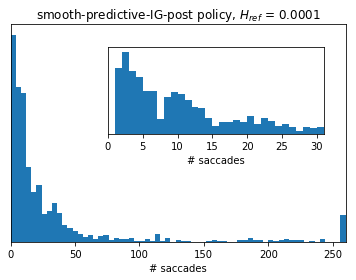

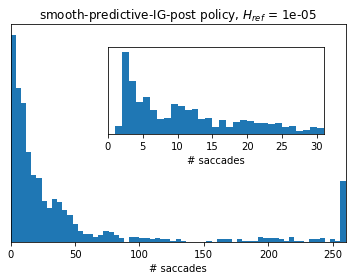

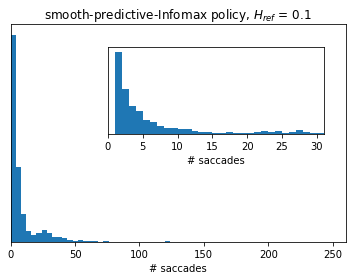

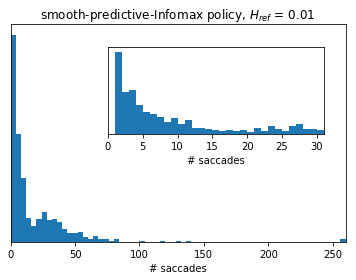

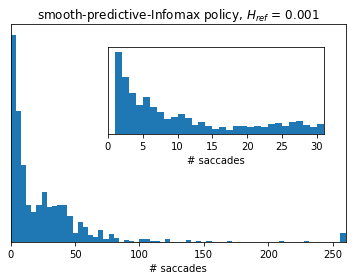

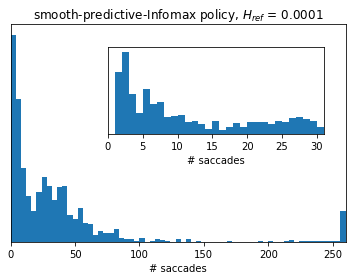

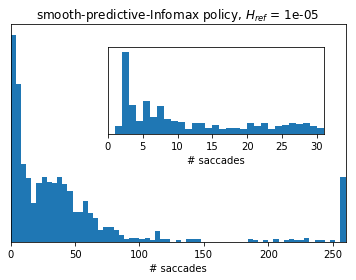

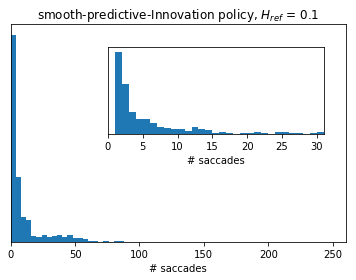

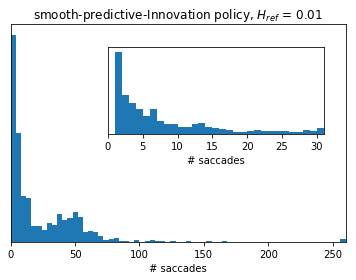

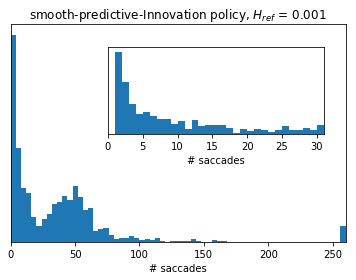

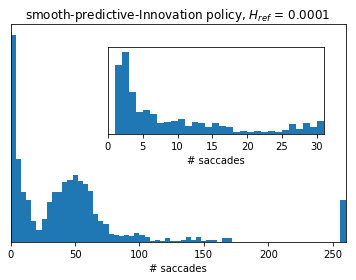

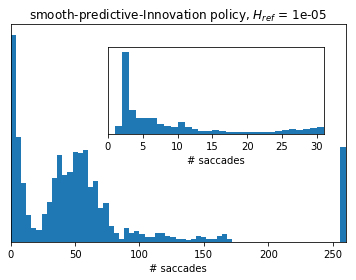

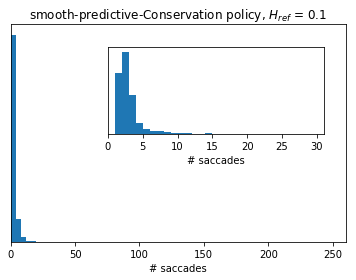

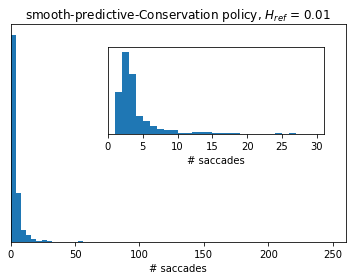

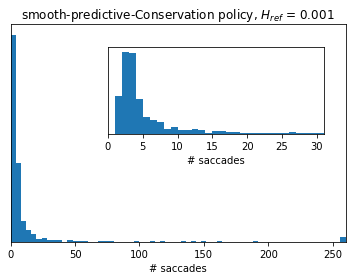

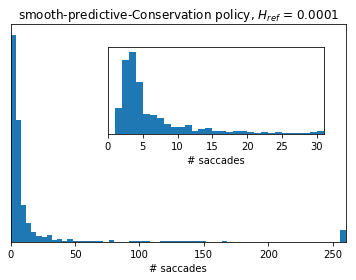

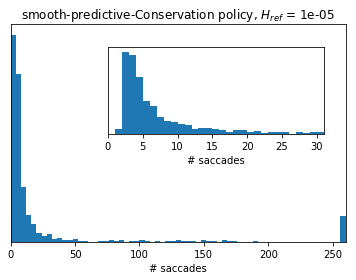

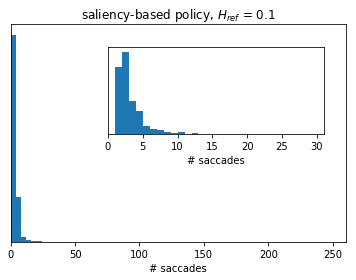

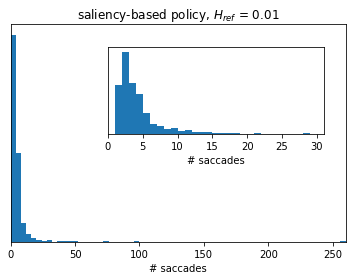

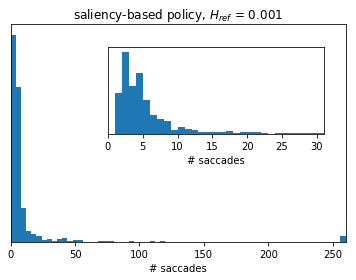

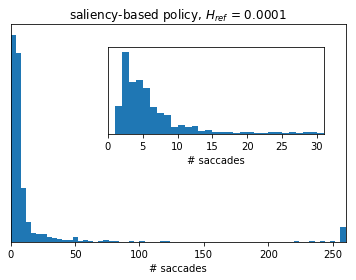

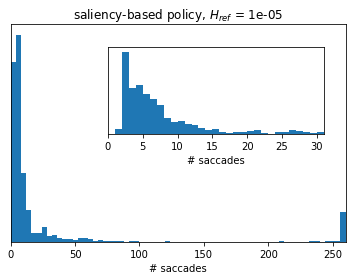

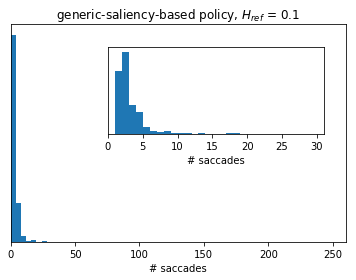

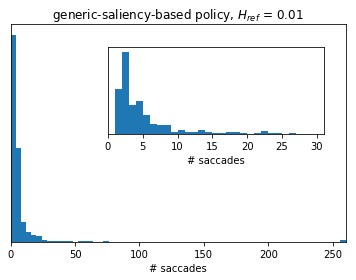

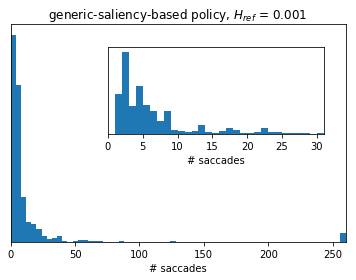

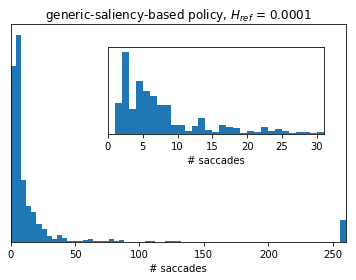

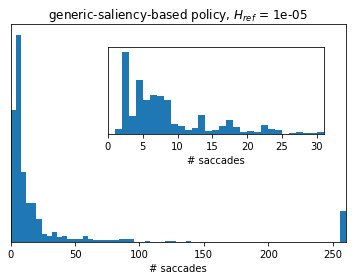

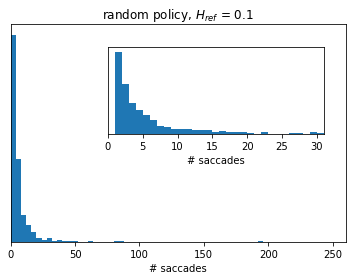

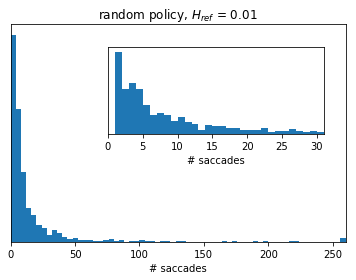

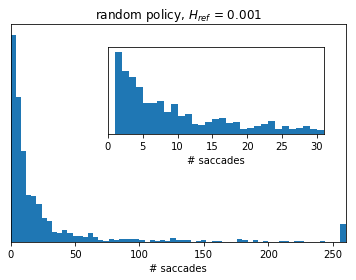

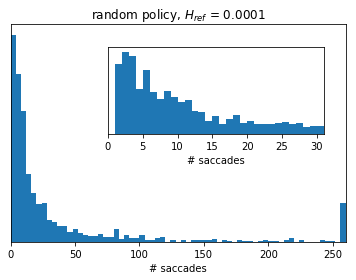

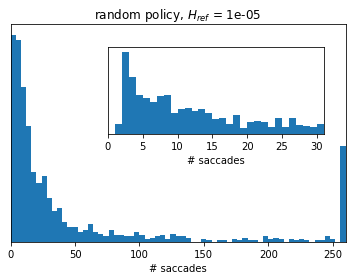

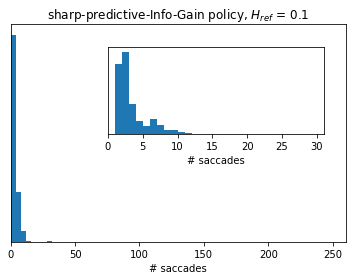

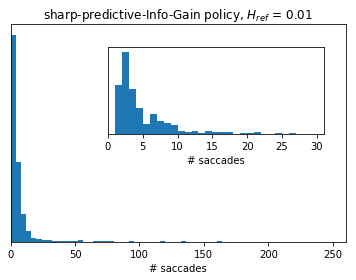

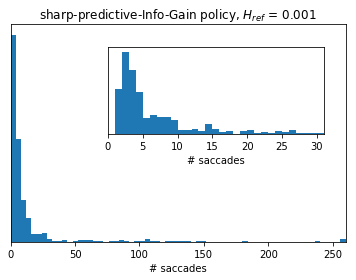

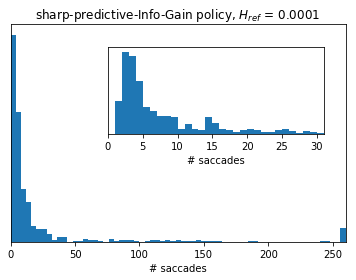

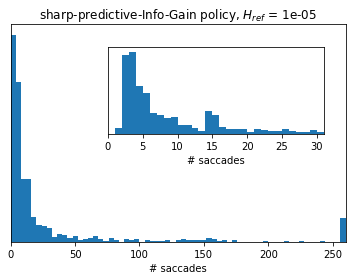

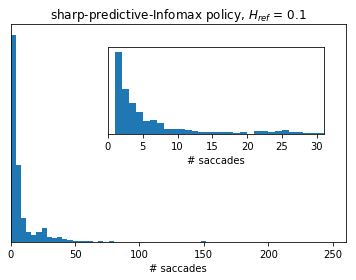

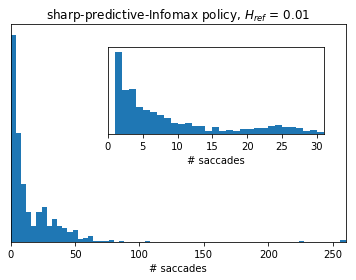

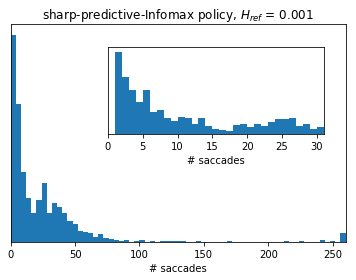

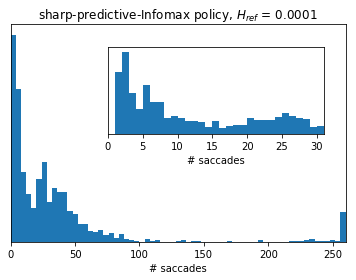

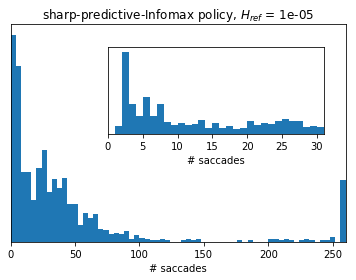

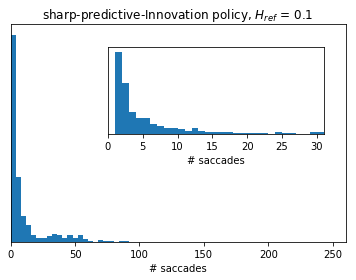

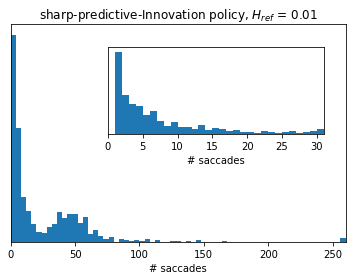

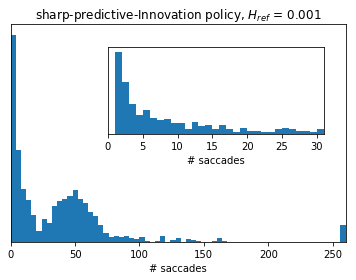

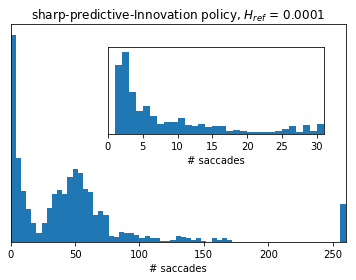

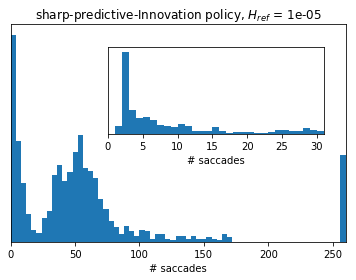

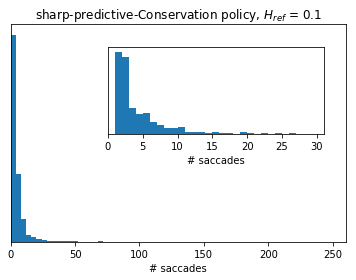

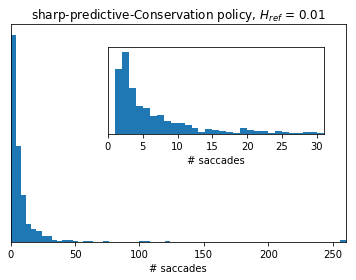

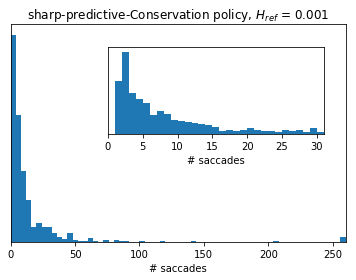

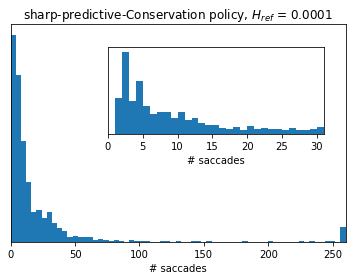

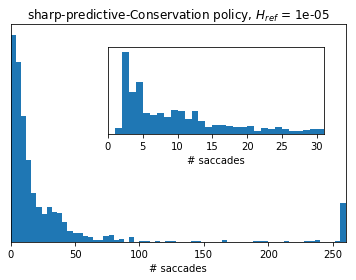

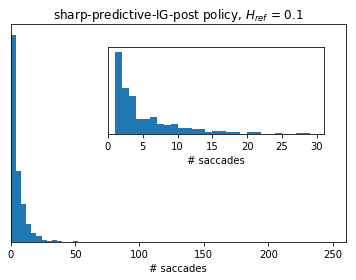

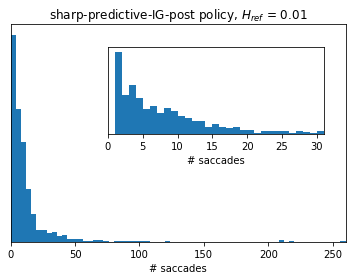

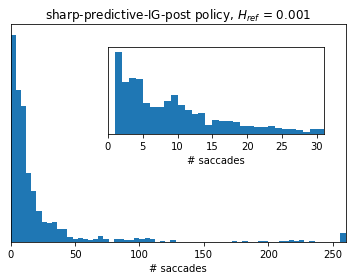

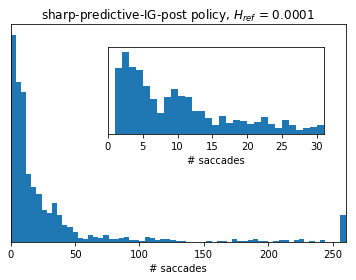

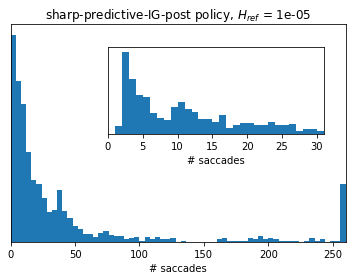

In [21]:
#for POL in ('predictive', 'predictive-dual', 'predictive-KL', 'FEP-predictive', 'FEP-predictive-dual', 'FEP-predictive-KL',  'saliency-based', 'generic-saliency-based', 'random'): #): #: #', ' ):
for POL in liste_pol:
    mem_classif_rate[POL] = []
    mem_mem_saccades[POL] = []
    mem_mem_compression_rate[POL] = []
    
    for THRESHOLD in liste_thresholds:
        classif_rate, mem_saccades, mem_compression_rate = affiche_records(dict_records[POL][THRESHOLD], liste_NB_TRIALS)
        mem_classif_rate[POL] += [classif_rate]
        mem_mem_saccades[POL] += [mem_saccades]
        mem_mem_compression_rate[POL] += [mem_compression_rate]

Policy : predictive-dual
Threshold : 1
classif rate : 61.6
nb_saccades : 4.125
nb_coeffs : 47.643
compression rate : 93.9230867347
final posterior : 0.796156613211
final entropy : 0.667606989425


Policy : predictive-dual
Threshold : 0.7
classif rate : 67.8
nb_saccades : 7.825
nb_coeffs : 70.02
compression rate : 91.068877551
final posterior : 0.876600975014
final entropy : 0.455195535209


Policy : predictive-dual
Threshold : 0.5
classif rate : 70.0
nb_saccades : 13.705
nb_coeffs : 97.323
compression rate : 87.5863520408
final posterior : 0.916586927384
final entropy : 0.332730806813


Policy : predictive-dual
Threshold : 0.3
classif rate : 70.6
nb_saccades : 34.809
nb_coeffs : 182.721
compression rate : 76.69375
final posterior : 0.934196505437
final entropy : 0.241143779973


Policy : predictive-dual
Threshold : 0.2
classif rate : 69.9
nb_saccades : 43.896
nb_coeffs : 219.471
compression rate : 72.00625
final posterior : 0.946281379985
final entropy : 0.187797088061

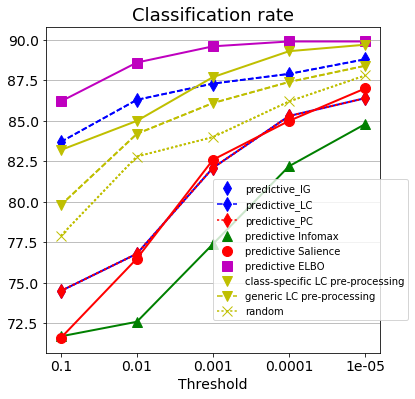

In [27]:
f = plt.figure(figsize = (6, 6))
NB_THRESHOLDS = 5

for i, POL in enumerate(liste_pol[:9]):
    plt.plot(np.arange(NB_THRESHOLDS), mem_classif_rate[POL], liste_col[i], lw=2)
    plt.plot(np.arange(NB_THRESHOLDS), mem_classif_rate[POL], liste_col[i]+liste_dot[i], label = liste_lab[i], ms = 10)
#plt.plot([-.1,4.1], [mem_classif_rate['full'][0]] * 2, 'r--', label = 'exhaustive scan', lw=2)
plt.legend(loc = (.5,.1))
plt.title('Classification rate', fontsize = 18)
plt.xlabel('Threshold', fontsize = 14)
#plt.xticks(np.arange(NB_THRESHOLDS), ('1e-1', '1e-2', '1e-3', '1e-4', '1e-5'), fontsize = 14)
plt.xticks(np.arange(NB_THRESHOLDS), liste_thresholds, fontsize = 14)
#plt.xticks(np.arange(NB_THRESHOLDS), ('2', '1.5', '1', '7e-1', '5e-1', '3e-1', '2e-1', '1e-1'), fontsize = 14)
plt.yticks(fontsize = 14)
#plt.xlim([-.2,4.2])
#plt.ylim([70, 100])
f.gca().yaxis.grid(True)
#plt.savefig('FEP-CNN-classif.png')
plt.savefig(nom_fic+'classif.png')



IndexError: tuple index out of range

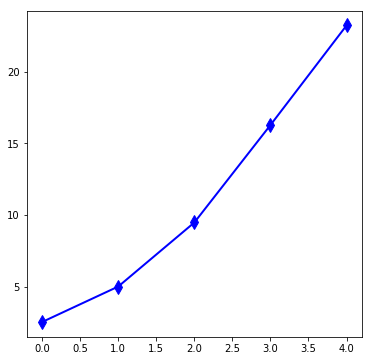

In [14]:
plt.figure(figsize = (6, 6))
axe = plt.subplot(1,1,1)
#liste_col = ['b', 'g', 'r','m','k','y','y--', 'y:','b:', 'g:', 'r:','m:','k:']
#liste_pol = ['H1-FEP', 'Dual-FEP', 'Infomax',  'Random']
#liste_pol =  ['IG', 'Infomax + BS', 'Infomax',  'Random']

for i, POL in enumerate(liste_pol[:8]):
    plt.plot(np.arange(NB_THRESHOLDS), np.mean(np.array(mem_mem_saccades[POL]), 1), liste_col[i], label = liste_lab[i], lw = 2)
    plt.plot(np.arange(NB_THRESHOLDS), np.mean(np.array(mem_mem_saccades[POL]), 1), liste_col[i]+liste_dot[i], ms = 10)
    '''asymmetric_error = [np.zeros(5), np.std(np.array(mem_mem_saccades[POL]), 1)]
    plt.errorbar(np.arange(5) + .02 * (i - 1), \
                 np.mean(np.array(mem_mem_saccades[POL]), 1), \
                 yerr = asymmetric_error, \
                 marker = '', \
                 color = liste_col[i],
                 linestyle = 'None')'''
plt.legend(loc = (.1,.6))
plt.title('Average #saccades', fontsize = 18)
plt.xlabel('Threshold', fontsize = 14)
plt.xticks(np.arange(5), liste_thresholds, fontsize = 14)
#plt.xticks(np.arange(NB_THRESHOLDS), ('1', '3e-1', '1e-1', '3e-2', '1e-2'), fontsize = 14)
plt.yticks(fontsize = 14)
#plt.xlim([-.2,4.2])
plt.xlim([-.3,4.3])
axe.yaxis.grid(True)
plt.ylim([0, 45])    
#axe.set_yscale('log')
plt.savefig(nom_fic+'saccades.png')




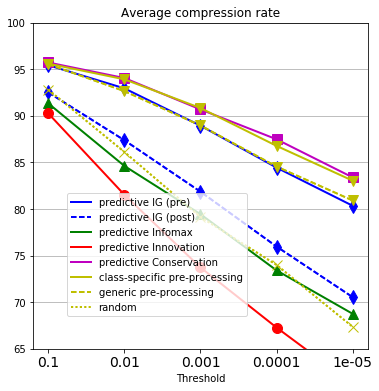

In [63]:
f = plt.figure(figsize = (6, 6))

axe = plt.subplot(1,1,1)
#liste_col = ['b', 'g', 'r','m','k','y','y--', 'y:','b:', 'g:', 'r:','m:','k:']
#liste_pol = ['H1-FEP', 'Dual-FEP', 'Infomax',  'Random']
for i, POL in enumerate(liste_pol[:8]):
    plt.plot(np.arange(NB_THRESHOLDS), np.mean(np.array(mem_mem_compression_rate[POL]), 1), \
             liste_col[i], label = liste_lab[i], lw = 2)
    plt.plot(np.arange(NB_THRESHOLDS), np.mean(np.array(mem_mem_compression_rate[POL]), 1), \
             liste_col[i]+liste_dot[i], ms = 10)
plt.legend(loc = (.1,.1))
plt.title('Average compression rate')
plt.xlabel('Threshold')
plt.xticks(np.arange(NB_THRESHOLDS), liste_thresholds, fontsize = 14)
#plt.xticks(np.arange(NB_THRESHOLDS), ('1', '3e-1', '1e-1', '3e-2', '1e-2'), fontsize = 14)
#plt.xticks(np.arange(NB_THRESHOLDS), ('2', '1.5', '1', '7e-1', '5e-1', '3e-1', '2e-1', '1e-1'), fontsize = 14)
#plt.xlim([-.2,4.2])
plt.ylim([65, 100])
axe.yaxis.grid(True)

plt.savefig(nom_fic+'compression.png')
